# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [5]:
# write your code here for task A
df_a['pred'] = np.where(df_a['proba']<0.5,0,1) #https://numpy.org/doc/stable/reference/generated/numpy.where.html
                                               #https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
#if the probability is greater than 0.5 pred value = 1
#else pred value = 0
print(df_a)

         y     proba  pred
0      1.0  0.637387     1
1      1.0  0.635165     1
2      1.0  0.766586     1
3      1.0  0.724564     1
4      1.0  0.889199     1
...    ...       ...   ...
10095  1.0  0.665371     1
10096  1.0  0.607961     1
10097  1.0  0.777724     1
10098  1.0  0.846036     1
10099  1.0  0.679507     1

[10100 rows x 3 columns]


In [6]:
#https://stackoverflow.com/questions/65235826/how-to-compare-2-columns-values-and-get-the-count-of-pairs-of-matches-in-python
#TP : if y = 1 and pred = 1 -> TRUE POSITIVE
tp_a = len(df_a[(df_a["y"] == 1) & (df_a["pred"] == 1)])
#TN : if y = 0 and pred = 0 -> TRUE NEGATIVE
tn_a = len(df_a[(df_a["y"] == 0) & (df_a["pred"] == 0)])
#FP : if y = 0 and pred = 1 -> FALSE POSITIVE
fp_a = len(df_a[(df_a["y"] == 0) & (df_a["pred"] == 1)])
#FN : if y = 1 and pred = 0 -> FALSE NEGATIVE
fn_a = len(df_a[(df_a["y"] == 1) & (df_a["pred"] == 0)])
print("TURE  POSITIVE = ",tp_a)
print("TURE  NEGATIVE = ",tn_a)
print("FALSE POSITIVE = ",fp_a)
print("FLASE NEGATIVE = ",fn_a)

TURE  POSITIVE =  10000
TURE  NEGATIVE =  0
FALSE POSITIVE =  100
FLASE NEGATIVE =  0


In [7]:
#Confusion matrix:
# TP FP
# FN TN
s = (2,2) #https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
confusion_matrix_a = np.zeros(s)
confusion_matrix_a[0,0] = tp_a #true positive
confusion_matrix_a[0,1] = fp_a #false positive
confusion_matrix_a[1,0] = fn_a #false negative
confusion_matrix_a[1,1] = tn_a #true negative
print("CONFUSION MATRIX:\n")
print(confusion_matrix_a)


CONFUSION MATRIX:

[[10000.   100.]
 [    0.     0.]]


In [8]:
#Precision : of all the points that are predicted to be positive, how many are actually positive
#Precision = TP/(TP+FP)
#Recall : of all the positive points, how many are recalled as positive
#Recall = TP/(TP+FN)
#F1 score : harmonic mean of precision and recall
#F1_score = 2*Precision*Recall/(Precision+Recall)
Precision_a = tp_a/(tp_a+fp_a)
Recall_a = tp_a/(tp_a+fn_a)
f1_score_a = 2*Precision_a*Recall_a/(Precision_a+Recall_a)
print("Precision = ",Precision_a)
print("Recall = ",Recall_a)
print("F1 Score = ",f1_score_a)



Precision =  0.9900990099009901
Recall =  1.0
F1 Score =  0.9950248756218906


In [9]:
#ROC-AUC
threshold_a = list(df_a["proba"])
# https://www.programiz.com/python-programming/methods/list/sort
threshold_a.sort(reverse=True)  #sorting thresholds in descending order
for i in range(len(threshold_a)):
    df_a[i] = np.where(df_a["proba"]>threshold_a[i],1,0) 
print(df_a)

         y     proba  pred  0  1  2  3  4  5  6  ...  10090  10091  10092  \
0      1.0  0.637387     1  0  0  0  0  0  0  0  ...      1      1      1   
1      1.0  0.635165     1  0  0  0  0  0  0  0  ...      1      1      1   
2      1.0  0.766586     1  0  0  0  0  0  0  0  ...      1      1      1   
3      1.0  0.724564     1  0  0  0  0  0  0  0  ...      1      1      1   
4      1.0  0.889199     1  0  0  0  0  0  0  0  ...      1      1      1   
...    ...       ...   ... .. .. .. .. .. .. ..  ...    ...    ...    ...   
10095  1.0  0.665371     1  0  0  0  0  0  0  0  ...      1      1      1   
10096  1.0  0.607961     1  0  0  0  0  0  0  0  ...      1      1      1   
10097  1.0  0.777724     1  0  0  0  0  0  0  0  ...      1      1      1   
10098  1.0  0.846036     1  0  0  0  0  0  0  0  ...      1      1      1   
10099  1.0  0.679507     1  0  0  0  0  0  0  0  ...      1      1      1   

       10093  10094  10095  10096  10097  10098  10099  
0          1      

In [10]:
#TRUE POSITIVE : actual = 1, predicted = 1
#FALSE POSITIVE: actual = 0, predicted = 1
#TRUE NEGATIVE : actual = 0, predicted = 0
#FALSE NEGATIVE: acutal = 1, predicted = 0
tp_list_a = []
fp_list_a = []
fn_list_a = []

for i in range(len(threshold_a)):
    tp_ai = len(df_a[(df_a["y"] == 1) & (df_a[i] == 1)])
    fp_ai = len(df_a[(df_a["y"] == 0) & (df_a[i] == 1)])
    fn_ai = len(df_a[(df_a["y"] == 1) & (df_a[i] == 0)])
    tp_list_a.append(tp_ai)
    fp_list_a.append(fp_ai)
    fn_list_a.append(fn_ai)

In [19]:
#TRUE POSITIVE RATE : TPR = TP/(TP+FN)
#FALSE POSITIVE RATE: FPR = FP/(TP+FN)
tpr_list_a = []
fpr_list_a = []
for j in range(len(tp_list_a)):
    tpr_a = tp_list_a[j]/(tp_list_a[j] + fn_list_a[j]) #TPR
    fpr_a = fp_list_a[j]*100/(tp_list_a[j] + fn_list_a[j]) #FPR
    tpr_list_a.append(tpr_a)
    fpr_list_a.append(fpr_a)


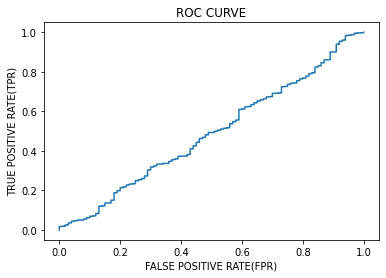

In [20]:
import matplotlib.pyplot as plt
plt.plot(fpr_list_a,tpr_list_a)
plt.xlabel("FALSE POSITIVE RATE(FPR)")
plt.ylabel("TRUE POSITIVE RATE(TPR)")
plt.title("ROC CURVE")
plt.show()

In [21]:
auc = np.trapz(tpr_list_a,fpr_list_a)
print("AREA UNDER CURVE = ",auc)

AREA UNDER CURVE =  0.48829900000000004


In [23]:
#Accuracy Score : ratio of no. of correctly classified points by total no. of points
total_points = len(df_a)
correctly_classified_points = len(df_a[df_a["y"] == df_a["pred"]])
accuracy = correctly_classified_points/total_points
print("Accuracy = ",accuracy)
print("Accuracy % =",accuracy*100,"%")
#Accuracy from confusion matrix
accuracy_cm = (tp_a+tn_a)/(tp_a+tn_a+fp_a+fn_a)
print("Accuracy from confusion matrix =",accuracy_cm)
print("Accuracy from confusion matrix %",accuracy_cm*100,"%")

Accuracy =  0.9900990099009901
Accuracy % = 99.00990099009901 %
Accuracy from confusion matrix = 0.9900990099009901
Accuracy from confusion matrix % 99.00990099009901 %




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [21]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [25]:
# write your code here for task B
df_b["pred"] = np.where(df_b["proba"]<0.5,0,1)
df_b

,y,proba,pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0
...,...,...,...
10095,0.0,0.474401,0
10096,0.0,0.128403,0
10097,0.0,0.499331,0
10098,0.0,0.157616,0


In [26]:
#TP : if y = 1 and pred = 1 -> TRUE POSITIVE
tp_b = len(df_b[(df_b["y"] == 1) & (df_b["pred"] == 1)])
#TN : if y = 0 and pred = 0 -> TRUE NEGATIVE
tn_b = len(df_b[(df_b["y"] == 0) & (df_b["pred"] == 0)])
#FP : if y = 0 and pred = 1 -> FALSE POSITIVE
fp_b = len(df_b[(df_b["y"] == 0) & (df_b["pred"] == 1)])
#FN : if y = 1 and pred = 0 -> FALSE NEGATIVE
fn_b = len(df_b[(df_b["y"] == 1) & (df_b["pred"] == 0)])
print("TURE  POSITIVE = ",tp_b)
print("TURE  NEGATIVE = ",tn_b)
print("FALSE POSITIVE = ",fp_b)
print("FLASE NEGATIVE = ",fn_b)

TURE  POSITIVE =  55
TURE  NEGATIVE =  9761
FALSE POSITIVE =  239
FLASE NEGATIVE =  45


In [27]:
s = (2,2) #https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
confusion_matrix_b = np.zeros(s)
confusion_matrix_b[0,0] = tp_b #true positive
confusion_matrix_b[0,1] = fp_b #false positive
confusion_matrix_b[1,0] = fn_b #false negative
confusion_matrix_b[1,1] = tn_b #true negative
print("CONFUSION MATRIX:\n")
print(confusion_matrix_b)

CONFUSION MATRIX:

[[  55.  239.]
 [  45. 9761.]]


In [28]:
#Precision : of all the points that are predicted to be positive, how many are actually positive
#Precision = TP/(TP+FP)
#Recall : of all the positive points, how many are recalled as positive
#Recall = TP/(TP+FN)
#F1 score : harmonic mean of precision and recall
#F1_score = 2*Precision*Recall/(Precision+Recall)
Precision_b = tp_b/(tp_b+fp_b)
Recall_b = tp_b/(tp_b+fn_b)
f1_score_b = 2*Precision_b*Recall_b/(Precision_b+Recall_b)
print("Precision = ",Precision_b)
print("Recall = ",Recall_b)
print("F1 Score = ",f1_score_b)

Precision =  0.1870748299319728
Recall =  0.55
F1 Score =  0.2791878172588833


In [29]:
#ROC-AUC
threshold = list(df_b["proba"])
# https://www.programiz.com/python-programming/methods/list/sort
threshold.sort(reverse=True)  #sorting thresholds in descending order
for i in range(len(threshold)):
    df_b[i] = np.where(df_b["proba"]>threshold[i],1,0) 
print(df_b)

         y     proba  pred  0  1  2  3  4  5  6  ...  10090  10091  10092  \
0      0.0  0.281035     0  0  0  0  0  0  0  0  ...      1      1      1   
1      0.0  0.465152     0  0  0  0  0  0  0  0  ...      1      1      1   
2      0.0  0.352793     0  0  0  0  0  0  0  0  ...      1      1      1   
3      0.0  0.157818     0  0  0  0  0  0  0  0  ...      1      1      1   
4      0.0  0.276648     0  0  0  0  0  0  0  0  ...      1      1      1   
...    ...       ...   ... .. .. .. .. .. .. ..  ...    ...    ...    ...   
10095  0.0  0.474401     0  0  0  0  0  0  0  0  ...      1      1      1   
10096  0.0  0.128403     0  0  0  0  0  0  0  0  ...      1      1      1   
10097  0.0  0.499331     0  0  0  0  0  0  0  0  ...      1      1      1   
10098  0.0  0.157616     0  0  0  0  0  0  0  0  ...      1      1      1   
10099  0.0  0.296618     0  0  0  0  0  0  0  0  ...      1      1      1   

       10093  10094  10095  10096  10097  10098  10099  
0          1      

In [31]:
#TRUE POSITIVE : actual = 1, predicted = 1
#FALSE POSITIVE: actual = 0, predicted = 1
#TRUE NEGATIVE : actual = 0, predicted = 0
#FALSE NEGATIVE: acutal = 1, predicted = 0
tp_list = []
fp_list = []
fn_list = []

for i in range(len(threshold)):
    tp = len(df_b[(df_b["y"] == 1) & (df_b[i] == 1)])
    fp = len(df_b[(df_b["y"] == 0) & (df_b[i] == 1)])
    fn = len(df_b[(df_b["y"] == 1) & (df_b[i] == 0)])
    tp_list.append(tp)
    fp_list.append(fp)
    fn_list.append(fn)

In [41]:
#TRUE POSITIVE RATE : TPR = TP/(TP+FN)
#FALSE POSITIVE RATE: FPR = FP/(TP+FN)
tpr_list_b = []
fpr_list_b = []
for j in range(len(tp_list)):
    tpr = tp_list[j]/(tp_list[j] + fn_list[j]) #TPR
    fpr = fp_list[j]*0.01/(tp_list[j] + fn_list[j]) #FPR
    tpr_list_b.append(tpr)
    fpr_list_b.append(fpr)


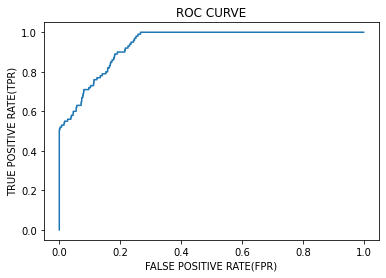

In [42]:
import matplotlib.pyplot as plt
plt.plot(fpr_list_b,tpr_list_b)
plt.xlabel("FALSE POSITIVE RATE(FPR)")
plt.ylabel("TRUE POSITIVE RATE(TPR)")
plt.title("ROC CURVE")
plt.show()


In [43]:
auc = np.trapz(tpr_list_b,fpr_list_b)
print("AREA UNDER CURVE = ",auc)

AREA UNDER CURVE =  0.9376570000000002


In [13]:
#Accuracy Score : ratio of no. of correctly classified points by total no. of points
total_points_b = len(df_b)
correctly_classified_points_b = len(df_b[df_b["y"] == df_b["pred"]])
accuracy_b = correctly_classified_points_b/total_points_b
print("Accuracy = ",accuracy_b)
print("Accuracy % =",accuracy_b*100,"%")
#Accuracy from confusion matrix
accuracy_cm_b = (tp_b+tn_b)/(tp_b+tn_b+fp_b+fn_b)
print("Accuracy from confusion matrix =",accuracy_cm_b)
print("Accuracy from confusion matrix %",accuracy_cm_b*100,"%")

Accuracy =  1.0
Accuracy % = 100.0 %
Accuracy from confusion matrix = 1.0
Accuracy from confusion matrix % 100.0 %


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [24]:
df_c=pd.read_csv('5_c.csv')
df_c.head()


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [25]:
 # write your code for task C
df_c["pred"] = np.where(df_c["y"]<0.5,0,1)
df_c
thresholds = list(df_c["prob"])
thresholds.sort(reverse = True) 
for i in range(len(thresholds)):
    df_c[i] = np.where(df_c["prob"]>thresholds[i],1,0) 
df_c

,y,prob,pred,0,1,2,3,4,5,6,...,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851
0,0,0.458521,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0.505037,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0.418652,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0.412057,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0.375579,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,1,0.491663,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2848,1,0.292109,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2849,1,0.659161,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2850,1,0.456265,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [70]:
#FALSE NEGATIVE: if label = 1 and predicted = 0
#FALSE POSITIVE: if label = 0 and predicted = 1
points_dict = dict()
points_list = []
for i in range(len(thresholds)):
    fn = len(df_c[(df_c["y"] == 1) & (df_c[i] == 0)])
    fp = len(df_c[(df_c["y"] == 0) & (df_c[i] == 1)])
    points_list.append((fn,fp))
#points_list ---> list of tuples, where each tuples contains false negatives, false positives pair



In [71]:
for k in range(len(thresholds)):
    points_dict[k] = points_list[k]
#points_dict ---> dictiory with threshold as key and (false negative, false positive) as value

In [72]:
A = []
all_dict = dict()
for j in range(len(points_dict)):
    value = points_dict[j][0]*500 + points_dict[j][1]*100
    A.append(value)
    all_dict[A[j]] = (points_dict[j][0],points_dict[j][1]) #dictionary with points as key and function as value
#all_dict ---> dictionary with function (500*falsenegative + 1--*falsepositive) as key 
#(false negative, false positive) as value



In [73]:
min_dict = dict()
min_value = min(all_dict)
for key,value in all_dict.items():
    if key == min_value:
        min_dict[key] = all_dict[key]
print(min_dict)
#min_dict ---> dictionary that contians the minimum value for function (500*falsenegative + 1--*falsepositive) as key
#correspoinding (false negative, false positive) as value
#NOTE: FALSE NEGATIVE MUST BE PENALIZED MORE, HENCE FALSE NEGATIVE<FALSE POSITIVE

{141000: (78, 1020)}


In [74]:
final_dict = dict()
for key,value in points_dict.items():
    final_dict[value] = key
#final_dict ---> dictionary after interchaing key and value of points dict  


In [75]:
final_dict.get((78,1020)) #getting the index of threshold corresponding to the (false negative, false positive)

1989

In [76]:
print("MINIMUM VALUE = ",min_value)
print("THRESHLOD THAT YIELDS THE MINIMUM VALUE FOR THE GIVEN FUNCTION =", thresholds[1989])

MINIMUM VALUE =  141000
THRESHLOD THAT YIELDS THE MINIMUM VALUE FOR THE GIVEN FUNCTION = 0.22987164436159915



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [47]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [48]:
 # write your code for task 5d
#Mean square error
n = len(df_d)

In [49]:
y = list(df_d["y"])
y_hat = list(df_d["pred"])
square_error_list = []
for i in range(len(y)):
    res = (y[i]-y_hat[i])**2
    square_error_list.append(res)
mean_square_error = -(1/n) * sum(square_error_list)
print("MEAN SQUARE ERROR = ", mean_square_error)

MEAN SQUARE ERROR =  -177.16569974554707


In [50]:
#Mean Absolute Percentage Error
#MAPE = (-1/n) summation{mod(ei/y)}, where ei = y-y_hat (actual - predicted)
# Here it is possible that the denomitor can take a value zero
# For this case we modify it
# Modified_MAPE = (mod(e1) +mod(e2)+ ...... + mod(en))/(y1+y2+.............+yn)
a = sum(y)
MAPE_error_list = []
for i in range(len(y)):
    errors = abs(y[i] - y_hat[i])
    MAPE_error_list.append(errors)
MAPE = sum(MAPE_error_list)/a
print("MEAN ABSOLUTE PERCENTAGE ERROR =",MAPE*100)
    

MEAN ABSOLUTE PERCENTAGE ERROR = 12.91202994009687


In [51]:
#R^2 error
y_bar = sum(y)/n
e_list = []
for i in range(len(y_hat)):
    e = (y_bar - y_hat[i])**2
    e_list.append(e)
SS_total = sum(e_list)

In [52]:
SS_residue_list = []
for i in range(len(y)):
    residues = (y[i] - y_hat[i])**2
    SS_residue_list.append(residues)
SS_residue = sum(SS_residue_list)

In [53]:
R_square = 1 - (SS_residue/SS_total)
print("R^2 =",R_square)

R^2 = 0.9544134826849505
